In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib as plt
import stock_utils as su
import trader as tr
import signaller as sg

from sklearn.externals import joblib

%matplotlib inline

## Choose a ticker symbol and generate a dataset with selected new features for it

In [2]:
#create a dataset for AAPL
rs = 42 # random state
tickers = ['AAPL', 'XOM']
symbol = tickers[0]
window = 5
look_ahead = 1

start_date = datetime.datetime(2017, 5, 1)
end_date = datetime.datetime(2017, 10, 30)

## Load saved models

In [3]:
import os
model_filenames = []
for file in os.listdir('models'):
    if file.endswith('.pkl'):
        model_filenames.append(file)

estimators = []
for filename in model_filenames:
    estimators.append(joblib.load('models/{0}'.format(filename)))

## Load stock data and calculate predictions

In [4]:
dataset = su.preprocess_data(symbol, window, look_ahead, start_date, end_date)

#calculate the predicted prices
pred = su.calculate_predictions_for_dataset(dataset=dataset, estimators=estimators, plot_and_print=False)

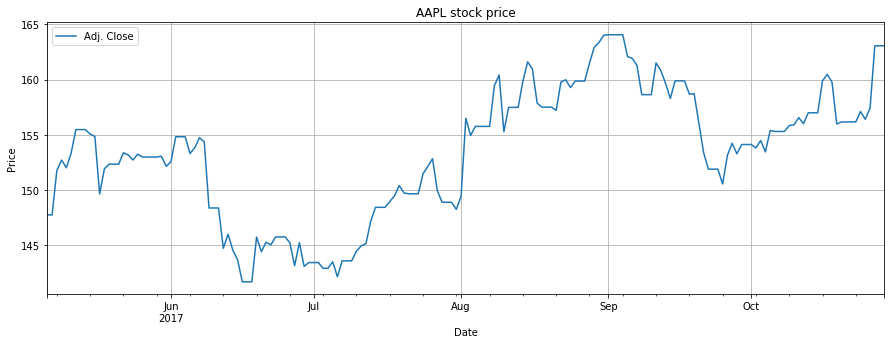

In [5]:
data_frame = dataset[['Adj. Close']]
ax = data_frame.plot(figsize=(15,5), grid=True, title='{0} stock price'.format(symbol))

ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend(loc='upper left')

## Calculate trade signals based on the predictions

In [6]:
#add the predicted prices to the dataset
dataset['Predicted Price'] = pred

#price variation in percentage which can inform trade decisions
delta = 0.02

signaller_params = {'delta' : delta}

#calculate trade signals based on different indicators and add those signals to the dataframe
signaller = sg.Signaller(signaller_params)

dataset = signaller.calculate_trade_signal(dataset)

dataset.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Daily return,Rolling mean 5,Lower Bollinger band 5,Upper Bollinger band 5,Cummulative return 5,Future Price,Predicted Price,RM Signal,Percentage Signal,BB Signal,Trade Signal,Current RM Signal,Current BB Signal,Current Signal
2017-05-06,145.571223,147.773241,145.571223,147.753403,0.000000,146.606767,144.403114,148.810419,0.016098,147.753403,147.255693,0,0,0,0,-1,0,-1
2017-05-07,145.571223,147.773241,145.571223,147.753403,0.000000,146.894418,144.512800,149.276035,0.009830,151.760678,147.250904,0,0,0,0,-1,0,-1
2017-05-08,147.822836,152.455008,147.822836,151.760678,0.027121,148.072795,143.451342,152.694248,0.040392,152.712902,151.467996,0,0,0,0,-1,0,-1
2017-05-09,152.623631,153.625450,152.207033,152.712902,0.006275,149.546758,144.589513,154.504003,0.050706,152.018572,152.933333,0,0,0,0,-1,0,-1
2017-05-10,152.385575,152.693064,150.877887,152.018572,-0.004547,150.399792,145.518225,155.281358,0.028867,153.327880,151.890739,0,0,0,0,-1,0,-1


In [7]:
dataset.describe()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Daily return,Rolling mean 5,Lower Bollinger band 5,Upper Bollinger band 5,Cummulative return 5,Future Price,Predicted Price,RM Signal,Percentage Signal,BB Signal,Trade Signal,Current RM Signal,Current BB Signal,Current Signal
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.0,177.0,177.000000,177.000000,177.0,177.000000
mean,153.457351,154.483998,152.310220,153.444374,0.000609,153.263849,150.722209,155.805490,0.002904,153.551530,153.398673,-0.033898,0.0,0.0,-0.033898,-0.209040,0.0,-0.209040
std,5.849993,5.844977,5.860449,5.850742,0.010268,5.649490,5.770362,6.027942,0.021983,5.919206,5.844150,0.210473,0.0,0.0,0.210473,0.980681,0.0,0.980681
min,142.322534,142.920109,141.625362,141.695080,-0.038777,142.673111,139.220397,143.752665,-0.064684,141.695080,141.970530,-1.000000,0.0,0.0,-1.000000,-1.000000,0.0,-1.000000
25%,149.294246,149.832064,147.969621,148.955620,-0.002344,149.546758,145.518225,150.904778,-0.006434,149.443640,149.142747,0.000000,0.0,0.0,0.000000,-1.000000,0.0,-1.000000
50%,154.010000,154.718900,152.710386,154.120000,0.000000,153.799548,152.059604,156.038444,0.004747,154.120000,153.685199,0.000000,0.0,0.0,0.000000,-1.000000,0.0,-1.000000
75%,157.860000,159.400000,156.720000,157.480000,0.004169,157.706000,155.026664,161.121035,0.015632,157.500000,157.578267,0.000000,0.0,0.0,0.000000,1.000000,0.0,1.000000
max,164.800000,164.940000,163.630000,164.050000,0.047251,164.040000,163.995279,167.359194,0.052221,166.720000,164.106616,1.000000,0.0,0.0,1.000000,1.000000,0.0,1.000000


## Define trading strategies based on the generated trade signals

In [8]:
#risk behaviour levels for buying stocks: the higher the value, the higher the confidence that the signal is correct
buy_risk_levels = {'high' : 1, 'moderate' : 2, 'low' : 3}

#risk behaviour levels for selling stocks: the lower the value, the higher the confidence that the signal is correct
sell_risk_levels = {'low' : -3, 'moderate' : -2, 'high' : -1}

debug_flag = True

initial_funds = 100000

pred_trader_configurations = [\
                         #balanced trader
                         {'name' : 'Prediction Balanced Trader', \
                          'buy_risk' : buy_risk_levels['moderate'], \
                          'sell_risk' : sell_risk_levels['moderate'], \
                          'use_signal_strength' : True, \
                          'initial_funds' : initial_funds, \
                          'debug' : debug_flag \
                         },\
                         #bearish trader
                         {'name' : 'Prediction Bearish Trader', \
                          'buy_risk' : buy_risk_levels['low'], \
                          'sell_risk' : sell_risk_levels['high'], \
                          'use_signal_strength' : True,
                          'initial_funds' : initial_funds, \
                          'debug' : debug_flag \
                         },\
                         #bullish trader
                         {'name' : 'Prediction Bullish Trader', \
                          'buy_risk' : buy_risk_levels['high'], \
                          'sell_risk' : sell_risk_levels['low'], \
                          'use_signal_strength' : True, \
                          'initial_funds' : initial_funds, \
                          'debug' : debug_flag \
                         }\
                        ]

normal_trader_configurations = [\
                         #balanced trader
                         {'name' : 'Normal Balanced Trader', \
                          'buy_risk' : buy_risk_levels['moderate'], \
                          'sell_risk' : sell_risk_levels['moderate'], \
                          'use_signal_strength' : True, \
                          'initial_funds' : initial_funds, \
                          'debug' : debug_flag \
                         },\
                         #bearish trader
                         {'name' : 'Normal Bearish Trader', \
                          'buy_risk' : buy_risk_levels['low'], \
                          'sell_risk' : sell_risk_levels['high'], \
                          'use_signal_strength' : True,
                          'initial_funds' : initial_funds, \
                          'debug' : debug_flag \
                         },\
                         #bullish trader
                         {'name' : 'Normal Bullish Trader', \
                          'buy_risk' : buy_risk_levels['high'], \
                          'sell_risk' : sell_risk_levels['low'], \
                          'use_signal_strength' : True, \
                          'initial_funds' : initial_funds, \
                          'debug' : debug_flag \
                         }\
                        ]

## Find the best trading strategy for the given stock data

In [9]:
# first run trading based on predictions
pred_trade_df = dataset[['Adj. Close', 'Trade Signal']]

highest_profit = -100
best_trader = None

for config in pred_trader_configurations:
    trader = tr.Trader(config)
    trader.trade(pred_trade_df)
    
    if trader.profit > highest_profit:
        highest_profit = trader.profit
        best_trader = config['name']

#then run trading based just on current data
normal_trade_df = dataset[['Adj. Close', 'Current Signal']]

for config in normal_trader_configurations:
    trader = tr.Trader(config)
    trader.trade(normal_trade_df)
    
    if trader.profit > highest_profit:
        highest_profit = trader.profit
        best_trader = config['name']
    
print('Best trader for this {0} stock market data is : {1}'.format(symbol, best_trader))

Prediction Balanced Trader starts trading
Prediction Balanced Trader enters position by buying 300.0 stocks at 147.75$ and has 55629.65$ left to invest
After 0 transactions, Prediction Balanced Trader has 300.0 stocks and 55629.65$ left in funds
Prediction Balanced Trader exits his position with a profit of 4.50%

Prediction Bearish Trader starts trading
Prediction Bearish Trader enters position by buying 300.0 stocks at 147.75$ and has 55629.65$ left to invest
Prediction Bearish Trader sells 100 stocks for 15283.63 $ on 2017-05-28 00:00:00
Prediction Bearish Trader sells 100 stocks for 14509.55 $ on 2017-06-28 00:00:00
Prediction Bearish Trader sells 100 stocks for 14951.31 $ on 2017-07-21 00:00:00
After 3 transactions, Prediction Bearish Trader has 0.0 stocks and 100374.13$ left in funds
Prediction Bearish Trader exits his position with a profit of 0.37%

Prediction Bullish Trader starts trading
Prediction Bullish Trader enters position by buying 300.0 stocks at 147.75$ and has 55629

## Let's test for another stock

In [10]:
symbol = tickers[1]

start_date2 = datetime.datetime(2015, 2, 1)
end_date2 = datetime.datetime(2015, 7, 30)

dataset2 = su.preprocess_data(symbol, window, look_ahead, start_date2, end_date2)

data2 = dataset2.drop(labels=['Future Price'], axis=1)
target2 = dataset2['Future Price']

dataset2.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Daily return,Rolling mean 5,Lower Bollinger band 5,Upper Bollinger band 5,Cummulative return 5,Future Price
2015-02-06,83.440255,83.603330,82.407444,82.896670,-0.001841,82.337372,80.239516,84.435227,0.029136,82.896670
2015-02-07,83.440255,83.603330,82.407444,82.896670,0.000000,82.806751,82.161207,83.452294,0.029136,82.896670
2015-02-08,83.440255,83.603330,82.407444,82.896670,0.000000,82.795961,82.160720,83.431201,-0.000650,82.951029
2015-02-09,82.806073,83.612390,82.658037,82.951029,0.000656,82.938114,82.804946,83.071283,0.008643,82.452743
2015-02-10,83.114104,83.114104,81.809501,82.452743,-0.006007,82.818756,82.406842,83.230671,-0.007186,82.081293


In [11]:
dataset2.describe()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Daily return,Rolling mean 5,Lower Bollinger band 5,Upper Bollinger band 5,Cummulative return 5,Future Price
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,78.103963,78.555055,77.574658,78.042391,-0.000483,78.131619,77.160766,79.102472,-0.002808,78.001822
std,2.377608,2.345245,2.344439,2.408199,0.007841,2.372581,2.375761,2.503152,0.014855,2.385300
min,72.384185,73.206421,72.146650,72.411592,-0.021924,73.127851,70.788223,74.369912,-0.042091,72.411592
25%,76.321103,76.896854,75.977698,76.373654,-0.004512,76.542618,75.472462,77.476418,-0.014072,76.373654
50%,77.746991,78.158342,77.321378,77.703450,0.000000,77.681881,76.699343,78.327657,-0.003010,77.648634
75%,79.560819,79.898509,79.026025,79.479281,0.001023,79.586194,78.739304,80.569476,0.006568,79.469119
max,84.029138,84.663321,83.612390,84.590843,0.040626,84.532860,84.273555,86.580640,0.040030,84.590843


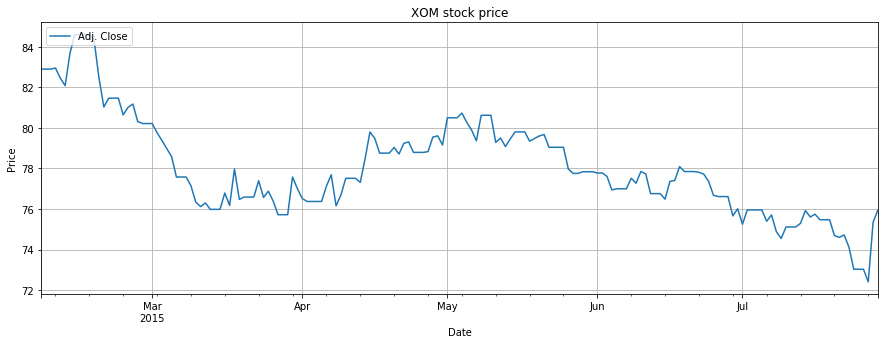

In [12]:
data_frame = data2[['Adj. Close']]

ax = data_frame.plot(figsize=(15,5), grid=True, title='{0} stock price'.format(symbol))

ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend(loc='upper left')

In [13]:
dataset2 = su.preprocess_data(symbol, window, look_ahead, start_date2, end_date2)

pred2 = su.calculate_predictions_for_dataset(dataset=dataset2, estimators=estimators, plot_and_print=False)

dataset2['Predicted Price'] = pred2

dataset2 = signaller.calculate_trade_signal(dataset2)

highest_profit = -100
best_trader = None

# first run trading based on predictions
pred_dataset2_df = dataset2[['Adj. Close', 'Trade Signal']]

for config in pred_trader_configurations:
    trader = tr.Trader(config)
    trader.trade(pred_dataset2_df)
    
    if trader.profit > highest_profit:
        highest_profit = trader.profit
        best_trader = config['name']

# then run trading based only on current data
normal_dataset2_df = dataset2[['Adj. Close', 'Current Signal']]

for config in normal_trader_configurations:
    trader = tr.Trader(config)
    trader.trade(normal_dataset2_df)
    
    if trader.profit > highest_profit:
        highest_profit = trader.profit
        best_trader = config['name']
    
print('Best trader for this {0} stock market data is : {1}'.format(symbol, best_trader))

Prediction Balanced Trader starts trading
Prediction Balanced Trader enters position by buying 600.0 stocks at 82.90$ and has 50212.26$ left to invest
After 0 transactions, Prediction Balanced Trader has 600.0 stocks and 50212.26$ left in funds
Prediction Balanced Trader exits his position with a profit of -4.26%

Prediction Bearish Trader starts trading
Prediction Bearish Trader enters position by buying 600.0 stocks at 82.90$ and has 50212.26$ left to invest
Prediction Bearish Trader sells 100 stocks for 8450.63 $ on 2015-02-16 00:00:00
Prediction Bearish Trader sells 100 stocks for 8109.41 $ on 2015-02-25 00:00:00
Prediction Bearish Trader sells 100 stocks for 7776.05 $ on 2015-05-30 00:00:00
Prediction Bearish Trader sells 100 stocks for 7504.07 $ on 2015-07-11 00:00:00
After 4 transactions, Prediction Bearish Trader has 200.0 stocks and 82052.42$ left in funds
Prediction Bearish Trader exits his position with a profit of -2.77%

Prediction Bullish Trader starts trading
Prediction 